<a href="https://colab.research.google.com/github/lisaong/data/blob/master/demos/Ninja_Cat_GEMM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Matrix Multiplication Example

* A matrix: A compressed version of an image
* B matrix: The principal components
* C matrix: The recovered (decompressed) version of the image


In [14]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from sklearn.decomposition import PCA

In [9]:
image = cv2.imread('/content/instory2-5abac9f5684a1.png')

# Convert to grayscale as we only need a 2-D matrix for this example
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

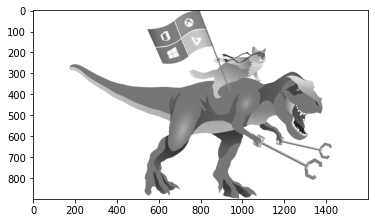

In [12]:
plt.imshow(gray, cmap='gray');

In [13]:
gray.shape

(900, 1600)

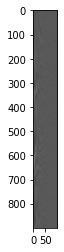

In [44]:
pca = PCA(n_components=100)

gray_reduced = pca.fit_transform(gray)

gray_reduced.shape

plt.imshow(gray_reduced, cmap='gray')

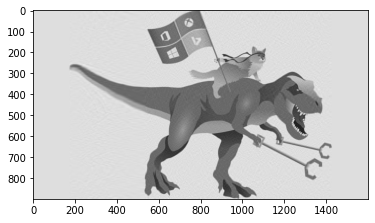

In [45]:
reversed = pca.inverse_transform(gray_reduced)

plt.imshow(reversed, cmap='gray')

In [46]:
pca.components_.shape # this will be our B matrix

(100, 1600)

In [47]:
gray_reduced.shape # this will be our A matrix

(900, 100)

Let's try reconstructing the image using numpy matrix multiplication (numpy.dot):



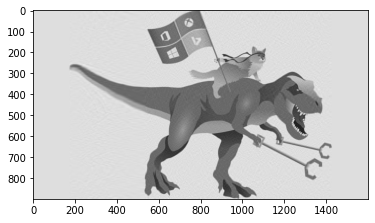

In [87]:
reversed_manual = np.dot(gray_reduced, pca.components_) + pca.mean_

plt.imshow(reversed_manual, cmap='gray')

## Save the matrices

In [83]:
pca.components_

array([[-2.16909531e-17, -9.73922611e-20, -1.05791901e-20, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 1.21422275e-16, -3.29302566e-17, -7.33571407e-18, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [ 7.68582967e-17,  8.82105372e-17,  1.83091804e-17, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       ...,
       [ 1.76622117e-14,  9.05398155e-15,  4.75034679e-15, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [-1.14626802e-14,  4.03637263e-15,  4.66001395e-15, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [-2.84888297e-15,  1.17280509e-14, -1.78026867e-14, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00]])

In [84]:
np.savetxt("B_matrix.csv", pca.components_, delimiter=',')

In [85]:
gray_reduced

array([[-1.40183399e+03,  5.50273090e+02, -3.99326179e+02, ...,
        -3.71887496e+00, -3.79495690e+01, -2.94643081e+01],
       [-1.38750423e+03,  5.59858974e+02, -4.22824601e+02, ...,
        -2.25568568e+00, -4.96342104e+01, -2.34939020e+01],
       [-1.34274281e+03,  5.88185961e+02, -4.96543374e+02, ...,
         2.68448429e+00, -5.29010946e+01, -5.33952200e+00],
       ...,
       [-1.38467386e+03,  5.64618887e+02, -3.45956969e+02, ...,
         3.55031890e+00, -3.67994069e+01, -1.16368222e+01],
       [-1.39504425e+03,  5.57001373e+02, -3.62517306e+02, ...,
         5.53421829e+00, -3.84068087e+01, -1.89588439e+01],
       [-1.40344004e+03,  5.50151197e+02, -3.75929274e+02, ...,
         1.19447876e-01, -3.39290668e+01, -2.51338011e+01]])

In [78]:
np.savetxt("A_matrix.csv", gray_reduced, delimiter=',')

## Back to RoboCode...

We'll call RoboCode's GEMM function to output the C_matrix.csv

## Verifying emitted RoboCode function 

Now that we've created C_matrix.csv, let's see if RoboCode's GEMM function actually did the right thing. 

In [81]:
C_matrix_robocode = np.loadtxt("C_matrix.csv", delimiter=',')

C_matrix_robocode.shape

(900, 1600)

In [89]:
plt.imshow(C_matrix_robocode + pca.mean_, cmap='gray')

NameError: ignored